In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import numpy as np

Source: https://www.kaggle.com/joniarroba/noshowappointments

In [5]:
lm = LogisticRegression()

In [6]:
df = pd.read_csv("No-show-Issue-Comma-300k.csv")



In [7]:
df = df.rename(columns = {"HiperTension" : "Hypertension", "ApointmentData":"AppointmentDate", "Alcoolism":"Alcoholism","Handcap":"Handicap"})

In [8]:
pd.set_option("display.max_columns",100)

Hypothesis: People who have an appointment within 15 days of scheduling one, and with health issues, who are sent a reminder about the appointment, are most likely to show up for their appointment.

In [9]:
df.head()

,Age,Gender,AppointmentRegistration,AppointmentDate,DayOfTheWeek,Status,Diabetes,Alcoholism,Hypertension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6


In [10]:
df.tail()

,Age,Gender,AppointmentRegistration,AppointmentDate,DayOfTheWeek,Status,Diabetes,Alcoholism,Hypertension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
299995,41,M,2014-03-24T09:28:22Z,2014-04-16T00:00:00Z,Wednesday,Show-Up,0,0,1,0,0,0,0,1,-23
299996,67,F,2014-11-21T12:00:36Z,2014-11-25T00:00:00Z,Tuesday,Show-Up,1,0,1,0,0,0,0,1,-4
299997,48,F,2014-07-24T15:46:38Z,2014-07-25T00:00:00Z,Friday,No-Show,0,0,0,0,0,1,0,0,-1
299998,5,M,2015-05-15T09:58:50Z,2015-05-21T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,0,-6
299999,0,M,2015-06-12T14:34:25Z,2015-07-15T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,1,-33


In [11]:
df = df.dropna(axis = 0, how = "any")

In [12]:
df[(df["Sms_Reminder"]  == 1) & (df["Status"] == "Show-Up")].count()

Age                        119106
Gender                     119106
AppointmentRegistration    119106
AppointmentDate            119106
DayOfTheWeek               119106
Status                     119106
Diabetes                   119106
Alcoholism                 119106
Hypertension               119106
Handicap                   119106
Smokes                     119106
Scholarship                119106
Tuberculosis               119106
Sms_Reminder               119106
AwaitingTime               119106
dtype: int64

In [13]:
df[(df["Sms_Reminder"] == 1) & (df["Status"] == "No-Show")].count()

Age                        51548
Gender                     51548
AppointmentRegistration    51548
AppointmentDate            51548
DayOfTheWeek               51548
Status                     51548
Diabetes                   51548
Alcoholism                 51548
Hypertension               51548
Handicap                   51548
Smokes                     51548
Scholarship                51548
Tuberculosis               51548
Sms_Reminder               51548
AwaitingTime               51548
dtype: int64

In [14]:
df[(df["Sms_Reminder"]  == 0) & (df["Status"] == "Show-Up")].count()

Age                        89632
Gender                     89632
AppointmentRegistration    89632
AppointmentDate            89632
DayOfTheWeek               89632
Status                     89632
Diabetes                   89632
Alcoholism                 89632
Hypertension               89632
Handicap                   89632
Smokes                     89632
Scholarship                89632
Tuberculosis               89632
Sms_Reminder               89632
AwaitingTime               89632
dtype: int64

In [15]:
df[(df["Sms_Reminder"]  == 0) & (df["Status"] == "No-Show")].count()

Age                        38915
Gender                     38915
AppointmentRegistration    38915
AppointmentDate            38915
DayOfTheWeek               38915
Status                     38915
Diabetes                   38915
Alcoholism                 38915
Hypertension               38915
Handicap                   38915
Smokes                     38915
Scholarship                38915
Tuberculosis               38915
Sms_Reminder               38915
AwaitingTime               38915
dtype: int64

In [16]:
# This statistic is measured by taking all 300,000 observations into consideration before having the data cleaned.
print("%.3f" + " is the percentage of people who did not show up to their doctor appointment (out of all 300000 observations).") % (float(90135/300000.0)*100)

30.045 is the percentage of people who did not show up to their doctor appointment (out of all 300000 observations).


In [17]:
119106 + 51548 + 89632 + 38915

299201

The scholarship variable refers to the, "Bolsa Familia" program in Brazil where families that are poor receive federal aid from the government. As a result, the families have to send their children to school. I believe that if someone in this data has the scholarship variable equal to 1, then they may be someone directly affected by the program.

Some outliers in this dataset are people who are of age 0. I am not sure if these subjects are included in the dataset because they are under 1 year of age or if their age was not recorded. Either way, it is probably best to remove them from the dataset.

Trying to find out what variables are most important in predicting if someone will show up to the appointment. 

In [18]:
df = df[df.Age > 0]

In [19]:
df = df[df.DayOfTheWeek != "Saturday"]

In [20]:
df = df[df.DayOfTheWeek != "Sunday"]

The line of code above (three lines above) retained all the rows in the dataframe where the age of the patient was greater than 0. It also eliminated the patients from the table who attended on saturday or sunday.

In [21]:
df

,Age,Gender,AppointmentRegistration,AppointmentDate,DayOfTheWeek,Status,Diabetes,Alcoholism,Hypertension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6
5,5,F,2014-06-17T06:47:27Z,2014-07-22T00:00:00Z,Tuesday,No-Show,0,0,0,0,0,0,0,1,-35
6,46,F,2015-06-19T19:53:58Z,2015-07-07T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-18
7,4,F,2015-08-07T08:19:19Z,2015-08-21T00:00:00Z,Friday,Show-Up,0,0,0,0,0,1,0,1,-14
8,20,F,2014-10-14T11:46:36Z,2014-10-28T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-14
9,51,F,2014-06-13T07:50:43Z,2014-06-17T00:00:00Z,Tuesday,Show-Up,1,0,1,0,0,0,0,1,-4


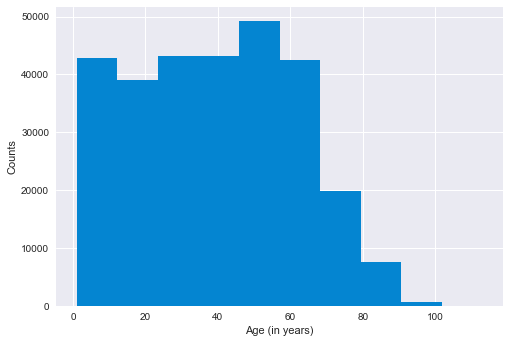

In [21]:
Age_hist_plot = df["Age"].hist(color = "#0485d1")
Age_hist_plot.set_xlabel("Age (in years)")
Age_hist_plot.set_ylabel("Counts")

In [22]:
min(df["AppointmentRegistration"])

'2013-05-29T15:14:11Z'

In [23]:
max(df['AppointmentRegistration'])

'2015-12-29T12:08:58Z'

In [24]:
min(df["AppointmentDate"])

'2014-01-02T00:00:00Z'

In [25]:
max(df["AppointmentDate"])

'2015-12-30T00:00:00Z'

Based on these inputs, we can say that the data spans about two and a half years.

In [26]:
df["Attend"] = df.Status.map({"No-Show": 0 , "Show-Up":1})
df.head()

,Age,Gender,AppointmentRegistration,AppointmentDate,DayOfTheWeek,Status,Diabetes,Alcoholism,Hypertension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime,Attend
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29,1
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1,1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1,1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15,1
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6,1


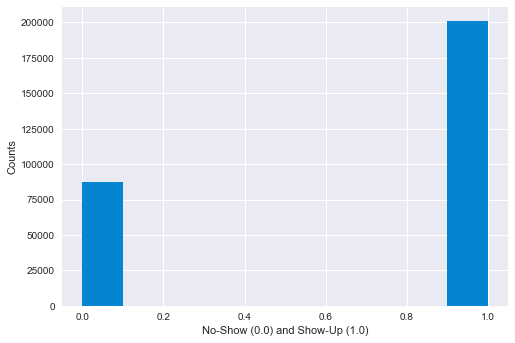

In [27]:
Showup_hist_plot = df["Attend"].hist(color = "#0485d1")
Showup_hist_plot.set_xlabel("No-Show (0.0) and Show-Up (1.0)")
Showup_hist_plot.set_ylabel("Counts")

In [28]:
df["Is_a_Female"] = df.Gender.map({"M" : 0,"F" : 1})
df.head()

,Age,Gender,AppointmentRegistration,AppointmentDate,DayOfTheWeek,Status,Diabetes,Alcoholism,Hypertension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime,Attend,Is_a_Female
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29,1,0
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1,1,1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1,1,1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15,1,0
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6,1,0


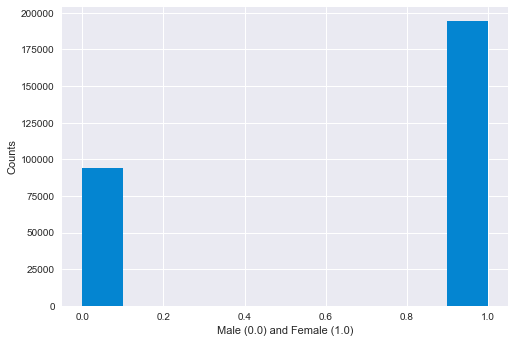

In [29]:
Gender_hist_plot = df["Is_a_Female"].hist(color = "#0485d1")
Gender_hist_plot.set_xlabel("Male (0.0) and Female (1.0)")
Gender_hist_plot.set_ylabel("Counts")

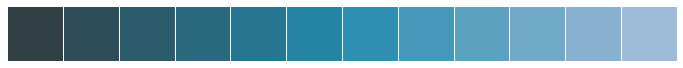

In [30]:
sb.palplot(sb.color_palette("PuBuGn_d",12))
#sb.palplot(sb.cubehelix_palette(10))

from the Seaborn website

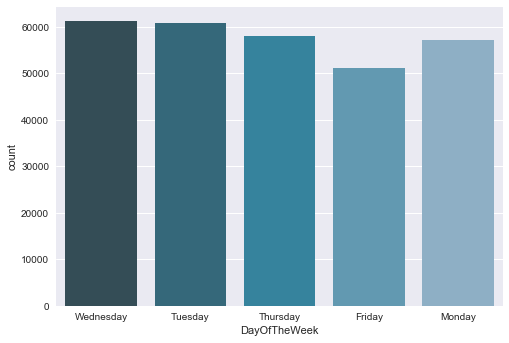

In [31]:
#Day_hist_plot = Day_Dummies["Dummy_Monday"].hist(color = "#0485d1")

sb.countplot(x ="DayOfTheWeek", data = df, palette = "PuBuGn_d")

In [32]:
Day_Dummies = pd.get_dummies(df.DayOfTheWeek, prefix = "Dummy").iloc[:,1:]
Day_Dummies

,Dummy_Monday,Dummy_Thursday,Dummy_Tuesday,Dummy_Wednesday
0,0,0,0,1
1,0,0,0,1
2,0,0,1,0
3,0,1,0,0
4,0,0,1,0
5,0,0,1,0
6,0,0,1,0
7,0,0,0,0
8,0,0,1,0
9,0,0,1,0


In [33]:
df["DayOfTheWeek"].value_counts()

Wednesday    61211
Tuesday      60727
Thursday     57994
Monday       57234
Friday       51106
Name: DayOfTheWeek, dtype: int64

In [34]:
df[(df["Scholarship"] == 1)].count()

Age                        28601
Gender                     28601
AppointmentRegistration    28601
AppointmentDate            28601
DayOfTheWeek               28601
Status                     28601
Diabetes                   28601
Alcoholism                 28601
Hypertension               28601
Handicap                   28601
Smokes                     28601
Scholarship                28601
Tuberculosis               28601
Sms_Reminder               28601
AwaitingTime               28601
Attend                     28601
Is_a_Female                28601
dtype: int64

In [41]:
18303+10298

28601

In [35]:
New_Df = pd.concat([df,Day_Dummies],axis=1)

In [36]:
New_Df["Register_Month"] = pd.DatetimeIndex(New_Df["AppointmentRegistration"]).month

In [37]:
New_Df["Appoint_Month"] = pd.DatetimeIndex(New_Df["AppointmentDate"]).month

In [38]:
New_Df["Days_Between_Reg_&_App"] = New_Df.AwaitingTime.apply(lambda x : x*-1)

In [39]:
New_Df["Did_Not_Attend"] = New_Df.Attend.map({1 : 0, 0 : 1})

In [40]:
New_Df["Registered_Month"] = New_Df.Register_Month.map({1 : "January", 2 : "February", 3 : "March", 4 : "April", 5 : "May", 6 : "June", 7: "July", 8 : "August", 9 : "September", 10 : "October", 11 : "November" , 12 : "December"})

In [41]:
New_Df["Appointment_Month"] = New_Df.Appoint_Month.map({1 : "January", 2 : "February", 3 : "March", 4 : "April", 5 : "May", 6 : "June", 7: "July", 8 : "August", 9 : "September", 10 : "October", 11 : "November" , 12 : "December"})

In [42]:
New_Df["Register_Season"] = New_Df.Register_Month.map({1 : "Summer", 2 : "Summer", 3 : "Summer", 4 : "Fall", 5 : "Fall", 6 : "Fall", 7: "Winter", 8 : "Winter", 9 : "Winter", 10 : "Spring", 11 : "Spring" , 12 : "Spring"})

In [43]:
New_Df["Appointment_Season"] = New_Df.Appoint_Month.map({1 : "Summer", 2 : "Summer", 3 : "Summer", 4 : "Fall", 5 : "Fall", 6 : "Fall", 7: "Winter", 8 : "Winter", 9 : "Winter", 10 : "Spring", 11 : "Spring" , 12 : "Spring"})

In [44]:
Reg_Month = pd.get_dummies(New_Df.Registered_Month, prefix = "Dummy_Register").iloc[:,1:]
Reg_Month.head()

,Dummy_Register_August,Dummy_Register_December,Dummy_Register_February,Dummy_Register_January,Dummy_Register_July,Dummy_Register_June,Dummy_Register_March,Dummy_Register_May,Dummy_Register_November,Dummy_Register_October,Dummy_Register_September
0,0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0


In [45]:
App_Month = pd.get_dummies(New_Df.Appointment_Month, prefix = "Dummy_Appoint").iloc[:,1:]
App_Month.head()

,Dummy_Appoint_August,Dummy_Appoint_December,Dummy_Appoint_February,Dummy_Appoint_January,Dummy_Appoint_July,Dummy_Appoint_June,Dummy_Appoint_March,Dummy_Appoint_May,Dummy_Appoint_November,Dummy_Appoint_October,Dummy_Appoint_September
0,0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0


In [46]:
New_Df = pd.concat([New_Df,Reg_Month],axis=1)

In [47]:
New_Df = pd.concat([New_Df,App_Month],axis=1)

In [48]:
New_Df

,Age,Gender,AppointmentRegistration,AppointmentDate,DayOfTheWeek,Status,Diabetes,Alcoholism,Hypertension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime,Attend,Is_a_Female,Dummy_Monday,Dummy_Thursday,Dummy_Tuesday,Dummy_Wednesday,Register_Month,Appoint_Month,Days_Between_Reg_&_App,Did_Not_Attend,Registered_Month,Appointment_Month,Register_Season,Appointment_Season,Dummy_Register_August,Dummy_Register_December,Dummy_Register_February,Dummy_Register_January,Dummy_Register_July,Dummy_Register_June,Dummy_Register_March,Dummy_Register_May,Dummy_Register_November,Dummy_Register_October,Dummy_Register_September,Dummy_Appoint_August,Dummy_Appoint_December,Dummy_Appoint_February,Dummy_Appoint_January,Dummy_Appoint_July,Dummy_Appoint_June,Dummy_Appoint_March,Dummy_Appoint_May,Dummy_Appoint_November,Dummy_Appoint_October,Dummy_Appoint_September
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29,1,0,0,0,0,1,12,1,29,0,December,January,Spring,Summer,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1,1,1,0,0,0,1,8,8,1,0,August,August,Winter,Winter,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1,1,1,0,0,1,0,2,2,1,0,February,February,Summer,Summer,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15,1,0,0,1,0,0,7,8,15,0,July,August,Winter,Winter,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6,1,0,0,0,1,0,10,10,6,0,October,October,Spring,Spring,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
5,5,F,2014-06-17T06:47:27Z,2014-07-22T00:00:00Z,Tuesday,No-Show,0,0,0,0,0,0,0,1,-35,0,1,0,0,1,0,6,7,35,1,June,July,Fall,Winter,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,46,F,2015-06-19T19:53:58Z,2015-07-07T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-18,1,1,0,0,1,0,6,7,18,0,June,July,Fall,Winter,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,4,F,2015-08-07T08:19:19Z,2015-08-21T00:00:00Z,Friday,Show-Up,0,0,0,0,0,1,0,1,-14,1,1,0,0,0,0,8,8,14,0,August,August,Winter,Winter,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8,20,F,2014-10-14T11:46:36Z,2014-10-28T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-14,1,1,0,0,1,0,10,10,14,0,October,October,Spring,Spring,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
9,51,F,2014-06-13T07:50:43Z,2014-06-17T00:00:00Z,Tuesday,Show-Up,1,0,1,0,0,0,0,1,-4,1,1,0,0,1,0,6,6,4,0,June,June,Fall,Fall,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [49]:
Reg_Season = pd.get_dummies(New_Df.Register_Season, prefix = "Dummy_Register_Season").iloc[:,1:]
Reg_Season.head()

,Dummy_Register_Season_Spring,Dummy_Register_Season_Summer,Dummy_Register_Season_Winter
0,1,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,1,0,0


In [50]:
App_Season = pd.get_dummies(New_Df.Appointment_Season, prefix = "Dummy_Appointment_Season").iloc[:,1:]
App_Season.head()

,Dummy_Appointment_Season_Spring,Dummy_Appointment_Season_Summer,Dummy_Appointment_Season_Winter
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,1,0,0


In [51]:
New_Df = pd.concat([New_Df, Reg_Season], axis = 1)

In [52]:
New_Df = pd.concat([New_Df, App_Season] , axis = 1)

In [53]:
New_Df

,Age,Gender,AppointmentRegistration,AppointmentDate,DayOfTheWeek,Status,Diabetes,Alcoholism,Hypertension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime,Attend,Is_a_Female,Dummy_Monday,Dummy_Thursday,Dummy_Tuesday,Dummy_Wednesday,Register_Month,Appoint_Month,Days_Between_Reg_&_App,Did_Not_Attend,Registered_Month,Appointment_Month,Register_Season,Appointment_Season,Dummy_Register_August,Dummy_Register_December,Dummy_Register_February,Dummy_Register_January,Dummy_Register_July,Dummy_Register_June,Dummy_Register_March,Dummy_Register_May,Dummy_Register_November,Dummy_Register_October,Dummy_Register_September,Dummy_Appoint_August,Dummy_Appoint_December,Dummy_Appoint_February,Dummy_Appoint_January,Dummy_Appoint_July,Dummy_Appoint_June,Dummy_Appoint_March,Dummy_Appoint_May,Dummy_Appoint_November,Dummy_Appoint_October,Dummy_Appoint_September,Dummy_Register_Season_Spring,Dummy_Register_Season_Summer,Dummy_Register_Season_Winter,Dummy_Appointment_Season_Spring,Dummy_Appointment_Season_Summer,Dummy_Appointment_Season_Winter
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29,1,0,0,0,0,1,12,1,29,0,December,January,Spring,Summer,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1,1,1,0,0,0,1,8,8,1,0,August,August,Winter,Winter,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1,1,1,0,0,1,0,2,2,1,0,February,February,Summer,Summer,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15,1,0,0,1,0,0,7,8,15,0,July,August,Winter,Winter,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6,1,0,0,0,1,0,10,10,6,0,October,October,Spring,Spring,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
5,5,F,2014-06-17T06:47:27Z,2014-07-22T00:00:00Z,Tuesday,No-Show,0,0,0,0,0,0,0,1,-35,0,1,0,0,1,0,6,7,35,1,June,July,Fall,Winter,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
6,46,F,2015-06-19T19:53:58Z,2015-07-07T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-18,1,1,0,0,1,0,6,7,18,0,June,July,Fall,Winter,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
7,4,F,2015-08-07T08:19:19Z,2015-08-21T00:00:00Z,Friday,Show-Up,0,0,0,0,0,1,0,1,-14,1,1,0,0,0,0,8,8,14,0,August,August,Winter,Winter,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
8,20,F,2014-10-14T11:46:36Z,2014-10-28T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-14,1,1,0,0,1,0,10,10,14,0,October,October,Spring,Spring,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
9,51,F,2014-06-13T07:50:43Z,2014-06-17T00:00:00Z,Tuesday,Show-Up,1,0,1,0,0,0,0,1,-4,1,1,0,0,1,0,6,6,4,0,June,June,Fall,Fall,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [54]:
New_Df["Registered_Month"].value_counts()

July         26295
May          26176
October      25641
August       25395
September    25211
January      24698
March        24296
June         23912
November     23258
April        22753
February     22087
December     18550
Name: Registered_Month, dtype: int64

In [55]:
New_Df["Appointment_Month"].value_counts()

July         26488
October      25751
May          25118
August       24880
September    24784
June         24757
November     24398
March        23636
April        22848
January      21985
February     21814
December     21813
Name: Appointment_Month, dtype: int64

In [56]:
New_Df["Register_Season"].value_counts()

Winter    76901
Fall      72841
Summer    71081
Spring    67449
Name: Register_Season, dtype: int64

In [57]:
New_Df["Appointment_Season"].value_counts()

Winter    76152
Fall      72723
Spring    71962
Summer    67435
Name: Appointment_Season, dtype: int64

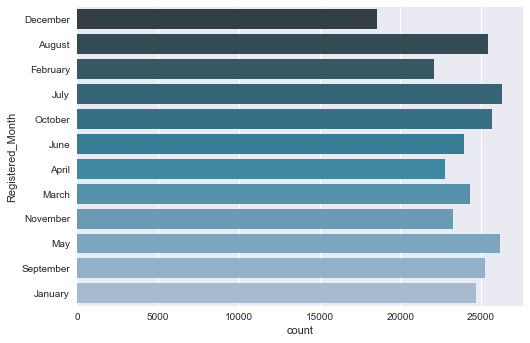

In [58]:
sb.countplot(y ="Registered_Month", data = New_Df, palette = "PuBuGn_d")

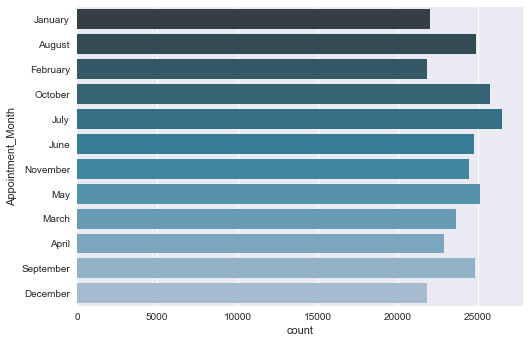

In [59]:
sb.countplot(y = "Appointment_Month", data = New_Df, palette = "PuBuGn_d")

In [60]:
del New_Df["DayOfTheWeek"]
del New_Df["Status"]
del New_Df["Gender"]
del New_Df["AppointmentDate"]
del New_Df["AppointmentRegistration"]
del New_Df["AwaitingTime"]
del New_Df["Registered_Month"]
del New_Df["Appointment_Month"]
del New_Df["Register_Season"]
del New_Df["Appointment_Season"]

In [61]:
New_Df

,Age,Diabetes,Alcoholism,Hypertension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,Attend,Is_a_Female,Dummy_Monday,Dummy_Thursday,Dummy_Tuesday,Dummy_Wednesday,Register_Month,Appoint_Month,Days_Between_Reg_&_App,Did_Not_Attend,Dummy_Register_August,Dummy_Register_December,Dummy_Register_February,Dummy_Register_January,Dummy_Register_July,Dummy_Register_June,Dummy_Register_March,Dummy_Register_May,Dummy_Register_November,Dummy_Register_October,Dummy_Register_September,Dummy_Appoint_August,Dummy_Appoint_December,Dummy_Appoint_February,Dummy_Appoint_January,Dummy_Appoint_July,Dummy_Appoint_June,Dummy_Appoint_March,Dummy_Appoint_May,Dummy_Appoint_November,Dummy_Appoint_October,Dummy_Appoint_September,Dummy_Register_Season_Spring,Dummy_Register_Season_Summer,Dummy_Register_Season_Winter,Dummy_Appointment_Season_Spring,Dummy_Appointment_Season_Summer,Dummy_Appointment_Season_Winter
0,19,0,0,0,0,0,0,0,0,1,0,0,0,0,1,12,1,29,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,24,0,0,0,0,0,0,0,0,1,1,0,0,0,1,8,8,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,4,0,0,0,0,0,0,0,0,1,1,0,0,1,0,2,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,5,0,0,0,0,0,0,0,1,1,0,0,1,0,0,7,8,15,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,38,0,0,0,0,0,0,0,1,1,0,0,0,1,0,10,10,6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
5,5,0,0,0,0,0,0,0,1,0,1,0,0,1,0,6,7,35,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
6,46,0,0,0,0,0,0,0,1,1,1,0,0,1,0,6,7,18,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
7,4,0,0,0,0,0,1,0,1,1,1,0,0,0,0,8,8,14,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
8,20,0,0,0,0,0,0,0,0,1,1,0,0,1,0,10,10,14,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
9,51,1,0,1,0,0,0,0,1,1,1,0,0,1,0,6,6,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [62]:
#X_3 = New_Df[["Handicap","Smokes","Diabetes","Age","Sms_Reminder","Hypertension","Days_Between_Reg_&_App","Dummy_Monday","Dummy_Tuesday", "Dummy_Wednesday", "Dummy_Thursday"]]
#y_3 = New_Df["Attend"]
X_3 = New_Df[["Dummy_Register_Season_Winter", "Dummy_Register_Season_Summer", "Dummy_Register_Season_Spring","Dummy_Appointment_Season_Summer","Sms_Reminder","Is_a_Female","Scholarship","Days_Between_Reg_&_App","Age", "Smokes", "Diabetes"]]
y_3 = New_Df["Attend"]

lm = sm.Logit(y_3, X_3)
result = lm.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.605607
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Attend   No. Observations:               288272
Model:                          Logit   Df Residuals:                   288261
Method:                           MLE   Df Model:                           10
Date:                Tue, 01 Aug 2017   Pseudo R-squ.:                 0.01231
Time:                        21:07:46   Log-Likelihood:            -1.7458e+05
converged:                       True   LL-Null:                   -1.7675e+05
                                        LLR p-value:                     0.000
===================================================================================================
                                      coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------
Dummy_Register_Season_Winter        0.2731      0.010     27.080      0.000         0.253     0.293
Dummy_Register_Season_Summer        0.1962      0.018     11.015      0.000         0.161     0.231
Dummy_Register_Season_Spring        0.1933      0.011     18.259      0.000         0.173     0.214
Dummy_Appointment_Season_Summer     0.0583      0.017      3.375      0.001         0.024     0.092
Sms_Reminder                        0.2055      0.008     25.747      0.000         0.190     0.221
Is_a_Female                         0.1332      0.008     16.264      0.000         0.117     0.149
Scholarship                        -0.1344      0.013    -10.064      0.000        -0.161    -0.108
Days_Between_Reg_&_App             -0.0088      0.000    -33.647      0.000        -0.009    -0.008
Age                                 0.0149      0.000     85.284      0.000         0.015     0.015
Smokes                             -0.2902      0.018    -16.447      0.000        -0.325    -0.256
Diabetes                           -0.0365      0.017     -2.207      0.027        -0.069    -0.004
===================================================================================================
"""

In [131]:
features_from_Df = ["Alcoholism", "Hypertension", "Handicap", "Tuberculosis","Smokes","Diabetes"]
features_from_Df_2 = ["Scholarship", "Age","Days_Between_Reg_&_App","Is_a_Female"]
features_from_Df_3 = ["Dummy_Tuesday","Dummy_Monday", "Dummy_Wednesday","Dummy_Thursday", "Dummy_Saturday"]
features_from_Df_4 = ["Dummy_Register_January","Dummy_Register_February","Dummy_Register_March","Dummy_Register_May","Dummy_Register_June","Dummy_Register_July","Dummy_Register_August","Dummy_Register_September","Dummy_Register_October","Dummy_Register_November","Dummy_Register_December"]
features_from_Df_5 = ["Dummy_Appoint_January","Dummy_Appoint_February","Dummy_Appoint_March","Dummy_Appoint_May","Dummy_Appoint_June","Dummy_Appoint_July","Dummy_Appoint_August","Dummy_Appoint_September","Dummy_Appoint_October","Dummy_Appoint_November","Dummy_Appoint_December"]
features_from_Df_6 = ["Dummy_Register_Season_Winter", "Dummy_Register_Season_Summer", "Dummy_Register_Season_Spring","Dummy_Appointment_Season_Summer","Dummy_Appointment_Season_Spring","Dummy_Appointment_Season_Winter" ]

Important_Feats = ["Age", "Smokes","Diabetes","Sms_Reminder","Is_a_Female","Scholarship","Days_Between_Reg_&_App","Dummy_Monday","Dummy_Tuesday","Dummy_Wednesday","Dummy_Thursday", "Dummy_Appoint_January","Dummy_Appoint_February","Dummy_Appoint_March","Dummy_Appoint_May","Dummy_Appoint_June","Dummy_Appoint_July","Dummy_Appoint_August","Dummy_Appoint_September","Dummy_Appoint_October","Dummy_Appoint_November","Dummy_Appoint_December", "Dummy_Register_January","Dummy_Register_February","Dummy_Register_March","Dummy_Register_May","Dummy_Register_June","Dummy_Register_July","Dummy_Register_August","Dummy_Register_September","Dummy_Register_October","Dummy_Register_November","Dummy_Register_December"]
Important_Feats_2 = ["Dummy_Register_Season_Winter", "Dummy_Register_Season_Summer", "Dummy_Register_Season_Spring","Dummy_Appointment_Season_Summer","Dummy_Appointment_Season_Spring", "Dummy_Appointment_Season_Winter","Sms_Reminder","Is_a_Female","Scholarship","Days_Between_Reg_&_App","Age", "Smokes", "Diabetes","Hypertension"]

X = New_Df[Important_Feats_2]
y = New_Df.Attend

In [132]:
from sklearn.metrics import roc_auc_score

Creating a training and testing set in order to use Random Forest Classificaton.

In [133]:
from sklearn.cross_validation import train_test_split

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [135]:
from sklearn.ensemble import RandomForestClassifier

new_name_for_classifier = RandomForestClassifier(n_estimators = 100)
new_name_for_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [136]:
predicted_values = new_name_for_classifier.predict(X_test)

In [137]:
import sklearn.metrics

In [138]:
conf_matrix = sklearn.metrics.confusion_matrix(y_test, predicted_values)

In [139]:
conf_matrix

array([[ 3882, 13653],
       [ 6937, 33183]])

Bottom Right = TP, Upper left = TN, Upper right = FP, Bottom Left = FN 

In [140]:
roc_auc_score(y_test, predicted_values)

0.5242397593361916

In [141]:
3727 + 13729 + 6764 + 33435

57655

In [142]:
57655*5

288275

In [143]:
new_name_for_classifier.feature_importances_

array([ 0.00527577,  0.00519713,  0.00287927,  0.00474351,  0.00291132,
        0.005751  ,  0.01616925,  0.01391514,  0.0076819 ,  0.41181739,
        0.49875595,  0.00638943,  0.00791949,  0.01059345])

/Users/Keshav/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


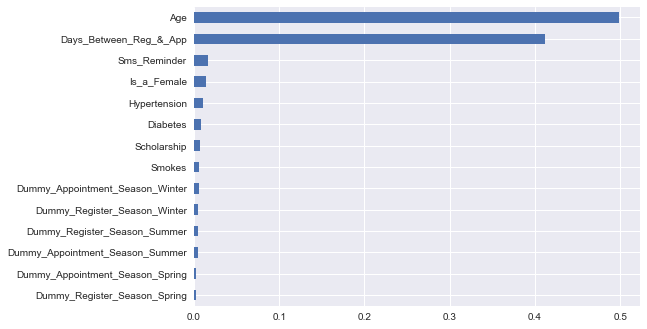

In [144]:
Feature_Importances_graph = pd.Series(new_name_for_classifier.feature_importances_, index = X.columns)
Feature_Importances_graph.sort()
Feature_Importances_graph.plot(kind="barh")

1. Try to run your months as continuous variable using Random Forest
2. Try to group your months into seasons (to see if it improves the strength of your model)
